In [1]:
import requests

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 10000
embedding_dim = 16
max_len = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

In [3]:
web_url = requests.get("https://storage.googleapis.com/learning-datasets/sarcasm.json")

dataset = web_url.json()

sentence = []
labels = []

for i in dataset:
    sentence.append(i["headline"])
    labels.append(i["is_sarcastic"])


In [4]:
train_sent = sentence[:training_size]
test_sent = sentence[training_size:]
train_labels = labels[:training_size]
test_labels = labels[training_size:]

In [5]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sent)

word_index = tokenizer.word_index

train_seq = tokenizer.texts_to_sequences(train_sent)
train_padded = pad_sequences(train_seq, maxlen=max_len, truncating=trunc_type, padding=padding_type)

test_seq = tokenizer.texts_to_sequences(test_sent)
test_padded = pad_sequences(test_seq, maxlen=max_len, truncating=trunc_type, padding=padding_type)

In [6]:
train_padded = np.array(train_padded)
train_labels = np.array(train_labels)
test_padded = np.array(test_padded)
test_labels = np.array(test_labels)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics=["accuracy"])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
num_epochs = 40
history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels), verbose=2)

Epoch 1/40
625/625 - 4s - 6ms/step - accuracy: 0.5652 - loss: 0.6786 - val_accuracy: 0.6223 - val_loss: 0.6478
Epoch 2/40
625/625 - 1s - 2ms/step - accuracy: 0.7432 - loss: 0.5438 - val_accuracy: 0.8141 - val_loss: 0.4531
Epoch 3/40
625/625 - 1s - 2ms/step - accuracy: 0.8242 - loss: 0.4038 - val_accuracy: 0.8217 - val_loss: 0.4047
Epoch 4/40
625/625 - 2s - 3ms/step - accuracy: 0.8480 - loss: 0.3532 - val_accuracy: 0.8183 - val_loss: 0.3927
Epoch 5/40
625/625 - 2s - 3ms/step - accuracy: 0.8690 - loss: 0.3124 - val_accuracy: 0.8271 - val_loss: 0.3803
Epoch 6/40
625/625 - 1s - 2ms/step - accuracy: 0.8834 - loss: 0.2863 - val_accuracy: 0.8475 - val_loss: 0.3541
Epoch 7/40
625/625 - 1s - 2ms/step - accuracy: 0.8921 - loss: 0.2640 - val_accuracy: 0.8190 - val_loss: 0.3964
Epoch 8/40
625/625 - 1s - 2ms/step - accuracy: 0.9011 - loss: 0.2455 - val_accuracy: 0.8433 - val_loss: 0.3529
Epoch 9/40
625/625 - 1s - 2ms/step - accuracy: 0.9087 - loss: 0.2261 - val_accuracy: 0.8326 - val_loss: 0.3871
E

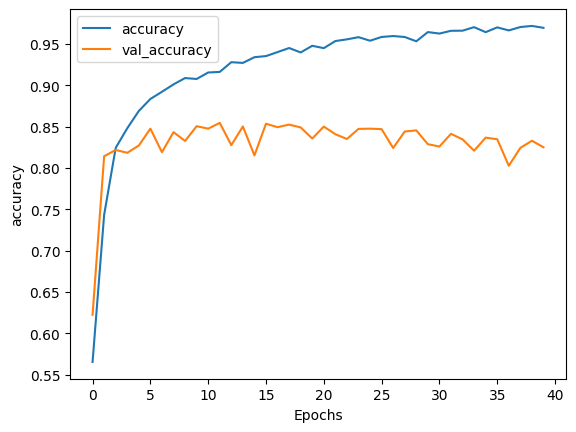

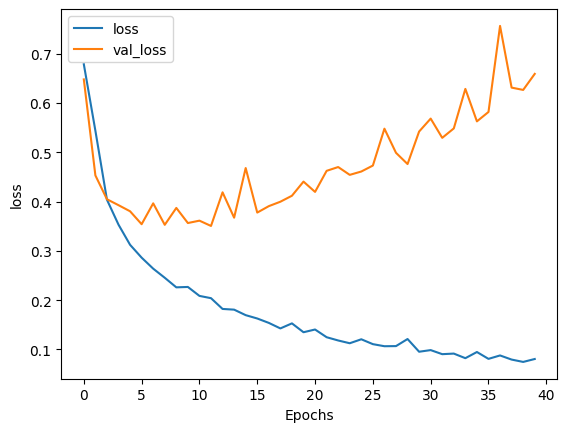

In [10]:
def graph(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

graph(history, "accuracy")
graph(history, "loss")

In [11]:
reverse_words = dict([(value, key) for (key, value) in word_index.items()])

def decode(text):
    return ' '.join([reverse_words.get(i, '?') for i in text])

print(decode(train_padded[0]))
print(train_sent[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [12]:
def predictor(text):
    sentence = text
    sequences = tokenizer.texts_to_sequences(sentence)
    padded = pad_sequences(sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)
    classes = model.predict(padded)
    print(classes[0])
    if classes[0][0] > 0.5:
      print("sarcastic")
    else:
      print("not sarcastic")

In [13]:
s1 = ["killer granny starting to fear spiders in the garden might be real"]
predictor(s1)
s2 = ["yeah! you aree right, i can't see you behind the curtains"]
predictor(s2)
s3 = ["in this dangerous situation, i am not scared"]
predictor(s3)
s4 = ["ukraine and russia are continuosly fighting"]
predictor(s4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
[0.99712867]
sarcastic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[0.6775884]
sarcastic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[0.85231084]
sarcastic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[0.00146009]
not sarcastic


#### END